# Building a pandas tutorial based on the COVID-19 dataset
_Author : Vivek M._

Welcome to the pandas tutorial using the Kaggle dataset about the COVID-19 outbreak in India.
***
""*__Pandas__ is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool,
built on top of the Python programming language.*""

It provides with functions and methods to efficiently manipulate large datasets

Installation : pip install pandas

__Pandas Datastructures :__
1. Pandas series : one dimensional arrays with labels (integers, strings,floats, python objects and more)
2. Pandas dataframes : two dimensional arrays with labels

***

1. First, import the pandas package as pd (This is the convention, but you may use any string to call pandas)

In [1404]:
import pandas as pd
pd.__version__

'0.24.2'

Tip: Include the following in your jupyternotebooks if you want borders between columns and rows in your dataframe display

In [1405]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

2. Read the dataset in to a pandas DataFrame 
  + index_col=0 will set the index column as the first column 
  + encoding ='utf-8' (default=None) or 'latin' will set the ascii unicode style if the default issues an error; try latin
  + sep=',' str, default ‘,’ Delimiter to use.
  + header = 0 will set the coulumn names; if not set first row will be taken as default. 
  + names= ['date','time'] ; pass the names of columns by hand. better to set the dtype also for each column
  + dtype= ('|S20','|S20',int,float) ; set the data type
  + skiprows = [0,1,2]; skip the first three rows
  + skipfooter = 20 ; skip last 20 rows
  + nrows = 20 only read 20 rows

In [1406]:
df = pd.read_csv('covid19_India/covid_19_india.csv')\
            #,index_col=0,encoding='utf-8')

***

3. Explore the read in pandas DataFrame
  + df.head(3) will display the first three rows (For negative values of n, this function returns all rows except the last n rows, equivalent to df[:-n].)
  +  df.tail(3) will display the last three rows
  +  df.dtypes will display the datatypes
  +  df.columns will display column names
  +  df.values will display the values in numpy format
  +  df.ndim will display the dimension of the dataframe
  +  df.shape and df.size will display the shape and size 
  +  df.empty will return True/False if the dataframe is empty or not
  +  df.iloc[0,3] df.loc['Date','Time'] Access a group of rows and columns by integer (labels)
  +  df.iat[1,2] df.at['Date','Time'] Access a single value for a row/column integer (label) pair
  +  df.describe() See statistical data of dataframe
  +  df.sort_values(by='ConfirmedIndianNational')

In [1407]:
df.head(3)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2


In [1408]:
df.dtypes

Sno                          int64
Date                        object
Time                        object
State/UnionTerritory        object
ConfirmedIndianNational      int64
ConfirmedForeignNational     int64
Cured                        int64
Deaths                       int64
Confirmed                    int64
dtype: object

In [1409]:
print(df.columns)
print(df.shape)
print(df.ndim)
print(df.size)
print(df.empty)

Index(['Sno', 'Date', 'Time', 'State/UnionTerritory',
       'ConfirmedIndianNational', 'ConfirmedForeignNational', 'Cured',
       'Deaths', 'Confirmed'],
      dtype='object')
(446, 9)
2
4014
False


***

4. Set the index column ; inplace =True will modify the original dataframe .
Otherwise the original dataframe is not modified. This is similar to Shallow vs Deep copy ; ddf = df.copy(deep=True)  deep copy is a new data frame whereas shallow (deep=False) copy only retains the references to the original dataframe. So, changes to the original affects the copy and vice versa

(_Beware of inplace=True; you are modifying the same dataframe. So, if you are running it twice, some methods like rename() or drop() will throw in an error, because the modification is already done_ )

In [1410]:
df.set_index('Date', inplace=True) 

***

5. Demostrating the df.loc and df.iloc. iloc is integer based access whereas loc is label based acces to the dataframe loc and iloc can access groups of dataframe by : whereas df.at and df.iat can access only individual datapoints

In [1411]:
print(df.loc['30/01/20','Time'])
print(df.iloc[0,1])

6:00 PM
6:00 PM


In [1412]:
df['State/UnionTerritory'].unique()

array(['Kerala', 'Telengana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
       'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra',
       'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand',
       'Odisha', 'Pondicherry', 'West Bengal', 'Chattisgarh',
       'Chandigarh', 'Chhattisgarh', 'Gujarat', 'Puducherry',
       'Himachal Pradesh', 'Madhya Pradesh', 'Bihar', 'Manipur',
       'Mizoram', 'Andaman and Nicobar Islands', 'Goa'], dtype=object)

6. We will drop the two columns which are not relevant for us. we can either  copy the df to a new dataframe or call inplace=True to modify the original dataframe

In [1413]:
#sdf = df.drop(['Sno','Time'],axis=1).copy()
df_copy=df.copy() # will keep  a copy of the original dataframe 
df.drop(['Sno','Time'],axis=1,inplace=True)
df.tail()

,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
Date,,,,,,
28/03/20,Tamil Nadu,34,6,2,1,40
28/03/20,Telengana,46,10,1,0,56
28/03/20,Uttarakhand,4,1,0,0,5
28/03/20,Uttar Pradesh,54,1,11,0,55
28/03/20,West Bengal,15,0,0,1,15


7. Convert the date index in to pandas datetime stamps so that pandas understands it as dates; otherwise these are just strings for pandas

In [1414]:
df.index = pd.to_datetime(df.index,errors='raise',dayfirst=True)# dayfirst=True
df.head()

,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
Date,,,,,,
2020-01-30,Kerala,1,0,0,0,1
2020-01-31,Kerala,1,0,0,0,1
2020-02-01,Kerala,2,0,0,0,2
2020-02-02,Kerala,3,0,0,0,3
2020-02-03,Kerala,3,0,0,0,3


8. Let us first sort the dataframe according to the index

In [1415]:
df.sort_index(ascending=True,inplace=True)
df.head()

,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
Date,,,,,,
2020-01-30,Kerala,1,0,0,0,1
2020-01-31,Kerala,1,0,0,0,1
2020-02-01,Kerala,2,0,0,0,2
2020-02-02,Kerala,3,0,0,0,3
2020-02-03,Kerala,3,0,0,0,3


In [1416]:
df['Total'] = df["ConfirmedIndianNational"] + df["ConfirmedForeignNational"]

8. Create a timeseries of cases grouped by 'State/UnionTerritory'

Kerala
Telengana
Delhi
Rajasthan
Uttar Pradesh
Haryana
Ladakh
Tamil Nadu
Karnataka
Maharashtra
Punjab
Jammu and Kashmir
Andhra Pradesh
Uttarakhand
Odisha
Pondicherry
West Bengal
Chattisgarh
Chandigarh
Chhattisgarh
Gujarat
Puducherry
Himachal Pradesh
Madhya Pradesh
Bihar
Manipur
Mizoram
Andaman and Nicobar Islands
Goa


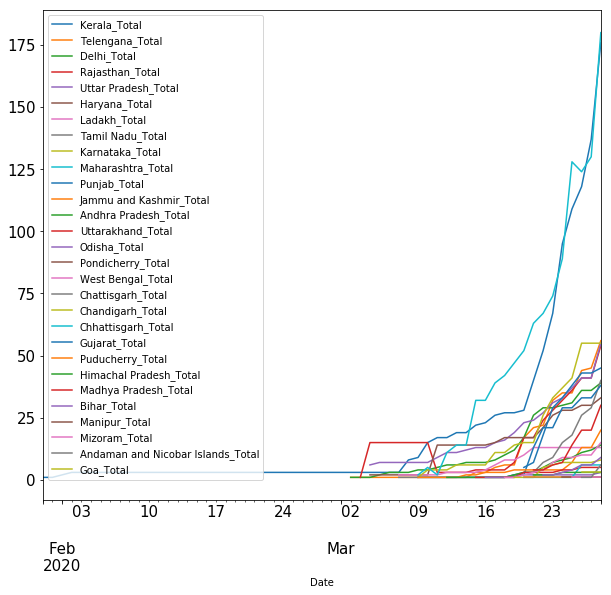

In [1417]:
graph_df = pd.DataFrame()
for uniq in df['State/UnionTerritory'].unique():
    print(uniq)
    state_df = df.copy()[df['State/UnionTerritory'] == uniq]
    state_df[f"{uniq}_Total"] = state_df["Total"]
    if graph_df.empty:
        graph_df = state_df[[f"{uniq}_Total"]]  # note the double square brackets! (so df rather than series)
    else:
        graph_df = graph_df.join(state_df[f"{uniq}_Total"])
    graph_df[f"{uniq}_Total"].plot(figsize=(10,9),legend=True,fontsize=15)
graph_df.tail(10)    
#state_df['ConfirmedIndianNational'].plot(figsize=(10,8),legend=0)
sdf=df.copy()

9. Groupby:  Returns a groupby object that contains information about the groups

Pandas groupby() method is what we use to split the data into groups based on the criteria we specify. That is, if we need to group our data by, for instance, gender we can type df.groupby('gender') given that our dataframe is called df and that the column is called gender. Now, in this post we are going to learn more examples on how to use groupby in Pandas.

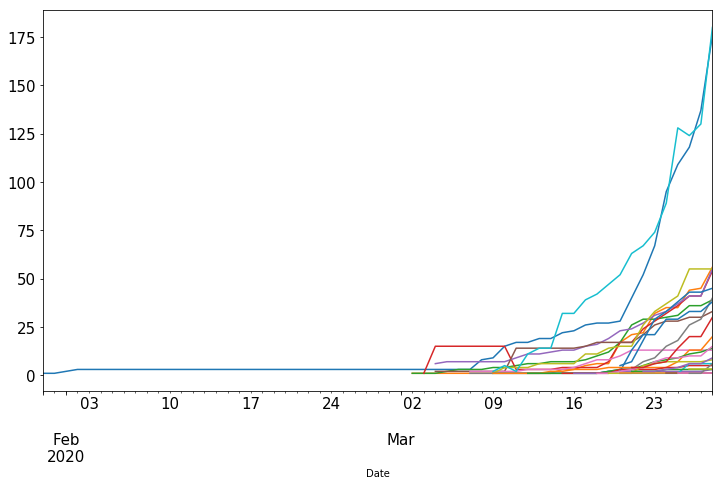

In [1418]:
states_groupby = df.groupby('State/UnionTerritory')
for uniq in df['State/UnionTerritory'].unique():
    states_groupby.get_group(uniq)['Total'].plot(figsize=(12,7),legend=False,fontsize=15)

9. Plotting the same figure using matplotlib for better handling of the plot features like legend, xticks

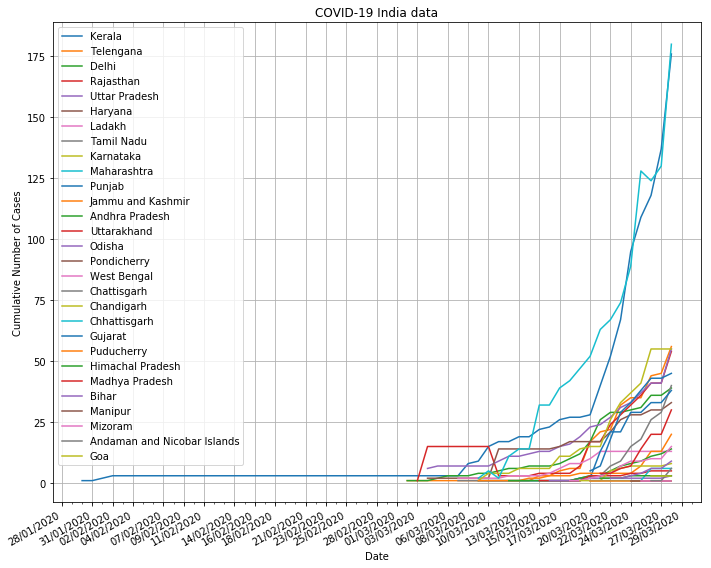

In [1419]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates 
from matplotlib.dates import MO, TU, WE, TH, FR, SA, SU

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
days = mdates.DayLocator() # every day
yearsFmt = mdates.DateFormatter('%d/%m/%Y')
fig, ax = plt.subplots(figsize=(10,8))
# format the ticks
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=(TU, FR,SU)))
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(days)
for uniq in df['State/UnionTerritory'].unique():
    ax.plot(states_groupby.get_group(uniq).index, 
            states_groupby.get_group(uniq)['Total'],label=uniq)
ax.set(xlabel='Date',ylabel='Cumulative Number of Cases',title='COVID-19 India data')
ax.grid()
ax.legend(loc=2)
fig.autofmt_xdate()
fig.tight_layout()
plt.show()


9. Track the number of new cases each days with the diff().

Diff() takes the difference between consecutive rows (can specifiy alternate rows with diff(periods=2)). Be careful to only inlcude integers and floats. For example, in our example 'State/UnionTerritory' column will create problem for diff(). So we have to drop it before diff()

In [1420]:
states_groupby.get_group('Kerala').drop('State/UnionTerritory',axis=1).diff().tail()
    

,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Total
Date,,,,,,
2020-03-24,27.0,1.0,1.0,0.0,28.0,28.0
2020-03-25,14.0,0.0,0.0,0.0,14.0,14.0
2020-03-26,9.0,0.0,2.0,0.0,9.0,9.0
2020-03-27,19.0,0.0,5.0,0.0,19.0,19.0
2020-03-28,39.0,0.0,0.0,0.0,39.0,39.0


In [1421]:
# Only selecting the severly affected states to avoid the plot looking clumsy
severe_states = []
for uniq in df['State/UnionTerritory'].unique():
    if ((states_groupby.get_group(uniq)['Total'][-1] > 50) & \
        (states_groupby.get_group(uniq)['Total'][-1] < 1000)):
        severe_states.append(uniq)

severe_states

['Kerala',
 'Telengana',
 'Rajasthan',
 'Uttar Pradesh',
 'Karnataka',
 'Maharashtra']

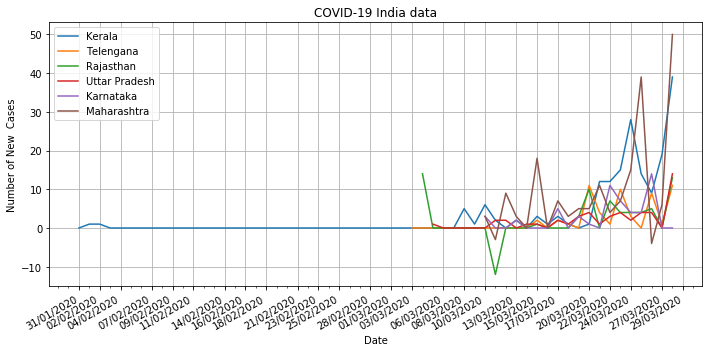

In [1422]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates 
from matplotlib.dates import MO, TU, WE, TH, FR, SA, SU

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
days = mdates.DayLocator() # every day
yearsFmt = mdates.DateFormatter('%d/%m/%Y')
fig, ax = plt.subplots(figsize=(10,5))
# format the ticks
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=(TU, FR,SU)))
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(days)
for uniq in severe_states:
    ax.plot(states_groupby.get_group(uniq).index, 
            states_groupby.get_group(uniq).drop('State/UnionTerritory',axis=1).\
            diff()['Total'],
            label=uniq)
    #states_groupby.get_group(uniq).drop('State/UnionTerritory',axis=1).diff()['Total'].hist()
ax.set(xlabel='Date',ylabel='Number of New  Cases',title='COVID-19 India data')
ax.grid()
ax.legend(loc=2)
fig.autofmt_xdate()
fig.tight_layout()
plt.show()

10. 'agg' method for groupby to know the statistical descriptors grouped by each state

    Also demonstrated the sort the dataframe and rename  columns

In [1423]:
from scipy.stats.mstats import gmean, hmean

state_descr = df.groupby('State/UnionTerritory')['Total'].agg(['count','mean', 'median','std','max',hmean,gmean])
state_descr.sort_values(by='max', ascending=False)
# Rename max column to total number  of cases
state_descr.rename({'max':'Total cases'},axis='columns',inplace=True)
state_descr.head()

,count,mean,median,std,Total cases,hmean,gmean
State/UnionTerritory,,,,,,,
Andaman and Nicobar Islands,3,2.666667,1.0,2.886751,6,1.384615,1.817121
Andhra Pradesh,17,4.764706,3.0,4.493459,14,1.890715,2.924697
Bihar,7,4.571429,4.0,2.572751,9,3.452055,3.970330
Chandigarh,10,5.000000,6.5,2.867442,8,2.461178,3.767561
Chattisgarh,1,1.000000,1.0,NaN,1,1.000000,1.000000


***

*Tip: Get the attributes for a python function/methods*

In [1424]:
import IPython

# Grouping by one factor
df_state = df.groupby('State/UnionTerritory')

# Getting all methods from the groupby object:
meth = [method_name for method_name in dir(df_state)
     if callable(getattr(df_state, method_name)) & ~method_name.startswith('_')]
# Printing the result
print(IPython.utils.text.columnize(meth)) 


agg        corr      cumsum     get_group  mean     pct_change  sem    transform
aggregate  corrwith  describe   head       median   pipe        shift  tshift   
all        count     diff       hist       min      plot        size   var      
any        cov       expanding  idxmax     ngroup   prod        skew 
apply      cumcount  ffill      idxmin     nth      quantile    std  
backfill   cummax    fillna     last       nunique  rank        sum  
bfill      cummin    filter     mad        ohlc     resample    tail 
boxplot    cumprod   first      max        pad      rolling     take 



***

11. Read in a new dataframe from the web. This dataframe will have the abbreviations for the state and join this with the state_descr dataframe.  

In [1425]:
import requests
web = requests.get("https://slusi.dacnet.nic.in/watershedatlas/list_of_state_abbreviation.htm")
dfs = pd.read_html(web.text)
#Another way is to use pd.read_html()
#dfs = pd.read_html("https://slusi.dacnet.nic.in/watershedatlas/list_of_state_abbreviation.htm")
state_abbv = dfs[1]
state_abbv.head()

,0,1,2
0,Sl. No.,State/ UT,Abbreviation
1,1.,Andhra Pradesh,AP
2,2.,Arunachal Pradesh,AR
3,3.,Assam,AS
4,4.,Bihar,BR


12. Two problems we have to fix in the above dataframe
    +  Columns names are wrong. The second row is the column name that we want
    +  We have to make the State/UT as the index after renaming it to State/UnionTerritory to match with our previous dataframe

In [1426]:
# Dont run this twice as inplace=True is called; you may have to rerun the whole kernel
state_abbv.rename(columns=state_abbv.iloc[0],inplace=True)
state_abbv.drop(state_abbv.index[0],inplace=True)
state_abbv.drop(['Sl. No.'],axis=1,inplace=True)
state_abbv.rename({'State/ UT':'State/UnionTerritory'},axis='columns',inplace=True)
state_abbv.set_index('State/UnionTerritory')
state_abbv.head()

,State/UnionTerritory,Abbreviation
1,Andhra Pradesh,AP
2,Arunachal Pradesh,AR
3,Assam,AS
4,Bihar,BR
5,Chhattisgarh,CG


In [1427]:
state_abbv.shape

(37, 2)

In [1428]:
state_abbv.set_index('State/UnionTerritory',inplace=True)
state_abbv.head()

,Abbreviation
State/UnionTerritory,
Andhra Pradesh,AP
Arunachal Pradesh,AR
Assam,AS
Bihar,BR
Chhattisgarh,CG


In [1429]:
#Found out that Tamil Nadu and Tripura are repeated twice in state_abbv dataframe. Getting\
# rid of the duplicate indices
state_abbv= state_abbv[~state_abbv.index.duplicated()]
state_abbv.shape

(35, 1)

In [1430]:
# Some states are missing in the state_abbv dataframe which are there in the state_descr
missing_states= [i for i in state_descr.index if i not in state_abbv.index ]
print([i for i in state_descr.index if i not in state_abbv.index ])

['Chattisgarh', 'Ladakh', 'Odisha', 'Puducherry', 'Telengana']


In [1431]:
# Adding these 5 states manually : But, beware Chattisgarh and Puducherry have two 
# separate entries in the state_descr. Ideally we should drop one entry. But,
#We will keep as it is for the moment
for ms in missing_states:
    if ms != 'Chattisgarh':
        state_abbv.loc[ms] = ms.upper()[:2]
    else :
        state_abbv.loc['Chattisgarh'] = 'CT'
state_abbv.tail(5)

/anaconda2/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Abbreviation
State/UnionTerritory,
Chattisgarh,CT
Ladakh,LA
Odisha,OD
Puducherry,PU
Telengana,TE


In [1432]:
#state_abbv.sort_values(by='Abbreviation')
state_abbv.head()

,Abbreviation
State/UnionTerritory,
Andhra Pradesh,AP
Arunachal Pradesh,AR
Assam,AS
Bihar,BR
Chhattisgarh,CG


In [1433]:
#state_descr.merge(state_abbv,left_on=state_descr.index,right_on=state_abbv.index,how='left')

In [1434]:
nstate_descr = state_descr.join(state_abbv['Abbreviation'])
nstate_descr.drop(['Chattisgarh','Pondicherry'],inplace=True)
nstate_descr

,count,mean,median,std,Total cases,hmean,gmean,Abbreviation
State/UnionTerritory,,,,,,,,
Andaman and Nicobar Islands,3,2.666667,1.0,2.886751,6,1.384615,1.817121,AN
Andhra Pradesh,17,4.764706,3.0,4.493459,14,1.890715,2.924697,AP
Bihar,7,4.571429,4.0,2.572751,9,3.452055,3.970330,BR
Chandigarh,10,5.000000,6.5,2.867442,8,2.461178,3.767561,CH
Chhattisgarh,9,2.666667,1.0,2.500000,6,1.384615,1.817121,CG
Delhi,27,13.444444,7.0,12.947626,39,4.101301,7.710825,DL
Goa,3,3.000000,3.0,0.000000,3,3.000000,3.000000,GA
Gujarat,9,29.000000,33.0,15.516121,45,16.121863,23.145419,GJ
Haryana,25,15.080000,14.0,10.152668,33,5.574122,10.172910,HR


##  Simple exercise to see if COVID-19 spread is connected to the population

Reading in the population dataset

In [1435]:
dfp = pd.read_csv('covid19_India/population_india_census2011.csv',index_col=0)
dfp.rename({'State / Union Territory': 'State/UnionTerritory'},axis='columns',inplace=True)
dfp.set_index('State/UnionTerritory',inplace=True)
dfp

,Population,Rural population,Urban population,Area,Density,Gender Ratio
State/UnionTerritory,,,,,,
Uttar Pradesh,199812341,155317278,44495063,"240,928 km2 (93,023 sq mi)","828/km2 (2,140/sq mi)",912
Maharashtra,112374333,61556074,50818259,"307,713 km2 (118,809 sq mi)",365/km2 (950/sq mi),929
Bihar,104099452,92341436,11758016,"94,163 km2 (36,357 sq mi)","1,102/km2 (2,850/sq mi)",918
West Bengal,91276115,62183113,29093002,"88,752 km2 (34,267 sq mi)","1,029/km2 (2,670/sq mi)",953
Madhya Pradesh,72626809,52557404,20069405,"308,245 km2 (119,014 sq mi)",236/km2 (610/sq mi),931
Tamil Nadu,72147030,37229590,34917440,"130,058 km2 (50,216 sq mi)","555/km2 (1,440/sq mi)",996
Rajasthan,68548437,51500352,17048085,"342,239 km2 (132,139 sq mi)",201/km2 (520/sq mi),928
Karnataka,61095297,37469335,23625962,"191,791 km2 (74,051 sq mi)",319/km2 (830/sq mi),973
Gujarat,60439692,34694609,25745083,"196,024 km2 (75,685 sq mi)",308/km2 (800/sq mi),919


In [1436]:
import re
def extract_density(value):
    density  = re.findall('(?P<value>[\d]*[,]?[\d][\d]{1,2})\s*(?P<unit>\/km2|sq mi)s?', value)
    #print(density)
    result = 0
    for value, unit in density:
        #print(value)
        if unit == '/km2':
            result = float(value.replace(',',''))
            #print('Final',value,result)
        else:
            result = np.nan
    return result

def extract_area(value):
    density  = re.findall('(?P<value>[\d]*[,]?[\d][\d]{1,2})\s*(?P<unit>km2|sq mi)s?', value)
    #print(density)
    result = 0
    for value, unit in density:
        #print(value)
        if unit == 'km2':
            result = float(value.replace(',',''))
            #print('Final',value,result)
        else:
            result = np.nan
    return result

In [1437]:
dfp['Density (per km2)'] =  dfp['Density'].apply(extract_density)
dfp['Area (per km2)'] =  dfp['Area'].apply(extract_area)


dfp.drop(['Area','Density'],axis=1,inplace=True)
dfp.head()

,Population,Rural population,Urban population,Gender Ratio,Density (per km2),Area (per km2)
State/UnionTerritory,,,,,,
Uttar Pradesh,199812341,155317278,44495063,912,828.0,240928.0
Maharashtra,112374333,61556074,50818259,929,365.0,307713.0
Bihar,104099452,92341436,11758016,918,1102.0,94163.0
West Bengal,91276115,62183113,29093002,953,1029.0,88752.0
Madhya Pradesh,72626809,52557404,20069405,931,236.0,308245.0


In [1438]:
all_together = nstate_descr.join(dfp)
all_together.head()

,count,mean,median,std,Total cases,hmean,gmean,Abbreviation,Population,Rural population,Urban population,Gender Ratio,Density (per km2),Area (per km2)
State/UnionTerritory,,,,,,,,,,,,,,
Andaman and Nicobar Islands,3,2.666667,1.0,2.886751,6,1.384615,1.817121,AN,380581,237093,143488,876,46.0,8249.0
Andhra Pradesh,17,4.764706,3.0,4.493459,14,1.890715,2.924697,AP,49577103,34966693,14610410,993,303.0,162968.0
Bihar,7,4.571429,4.0,2.572751,9,3.452055,3.970330,BR,104099452,92341436,11758016,918,1102.0,94163.0
Chandigarh,10,5.000000,6.5,2.867442,8,2.461178,3.767561,CH,1055450,28991,1026459,818,9252.0,114.0
Chhattisgarh,9,2.666667,1.0,2.500000,6,1.384615,1.817121,CG,25545198,19607961,5937237,991,189.0,135191.0


In [1439]:
all_together.drop(['count','hmean','gmean','Abbreviation','Rural population',
                   'Urban population','Area (per km2)'],axis=1).corr()

,mean,median,std,Total cases,Population,Gender Ratio,Density (per km2)
mean,1.000000,0.915765,0.913013,0.835773,0.518152,-0.102363,-0.030715
median,0.915765,1.000000,0.687866,0.589196,0.472327,-0.250086,-0.038219
std,0.913013,0.687866,1.000000,0.977169,0.424001,0.102175,-0.024808
Total cases,0.835773,0.589196,0.977169,1.000000,0.395539,0.208142,-0.043158
Population,0.518152,0.472327,0.424001,0.395539,1.000000,-0.014261,-0.160940
Gender Ratio,-0.102363,-0.250086,0.102175,0.208142,-0.014261,1.000000,-0.406407
Density (per km2),-0.030715,-0.038219,-0.024808,-0.043158,-0.160940,-0.406407,1.000000


### Exercise to see if there is any correlation between the spread of COVID-19 among different states


In [1440]:
# to only limit to those states which have data for more than 20 days
states_large = [] 
count = pd.DataFrame(df.groupby('State/UnionTerritory')['Total'].count())
#print(count.head())
for s,v in zip(count.index,count.values):
    #print(s,v[0])
    if v[0] >= 20:
       states_large.append(s+'_Total')
all_states= [c+'_Total' for c in df['State/UnionTerritory'].unique()]
remove_states=list(set(all_states) -set(states_large))
print('List of  states that are included:\n',states_large)
print('\n')
print('List of states that needs to be removed:\n',remove_states)

List of  states that are included:
 ['Delhi_Total', 'Haryana_Total', 'Jammu and Kashmir_Total', 'Karnataka_Total', 'Kerala_Total', 'Ladakh_Total', 'Maharashtra_Total', 'Punjab_Total', 'Rajasthan_Total', 'Tamil Nadu_Total', 'Telengana_Total', 'Uttar Pradesh_Total']


List of states that needs to be removed:
 ['West Bengal_Total', 'Puducherry_Total', 'Himachal Pradesh_Total', 'Gujarat_Total', 'Chandigarh_Total', 'Odisha_Total', 'Andhra Pradesh_Total', 'Pondicherry_Total', 'Bihar_Total', 'Manipur_Total', 'Chattisgarh_Total', 'Andaman and Nicobar Islands_Total', 'Goa_Total', 'Chhattisgarh_Total', 'Madhya Pradesh_Total', 'Mizoram_Total', 'Uttarakhand_Total']


In [1441]:

ngraph_df = pd.DataFrame()
for uniq in sdf['State/UnionTerritory'].unique():
    #print(uniq)
    nstate_df = sdf.copy()[df['State/UnionTerritory'] == uniq]
    nstate_df[f"{uniq}_Total"] = nstate_df["Total"]
    if ngraph_df.empty:
        ngraph_df = nstate_df[[f"{uniq}_Total"]]  # note the double square brackets! (so df rather than series)
    else:
        ngraph_df = ngraph_df.join(nstate_df[f"{uniq}_Total"])
    #ngraph_df[f"{uniq}_Total"].plot(figsize=(10,9),legend=True,fontsize=15)
state_timeseries = ngraph_df.tail(20) 
state_timeseries.drop(remove_states,axis=1,inplace=True)

/anaconda2/envs/py3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


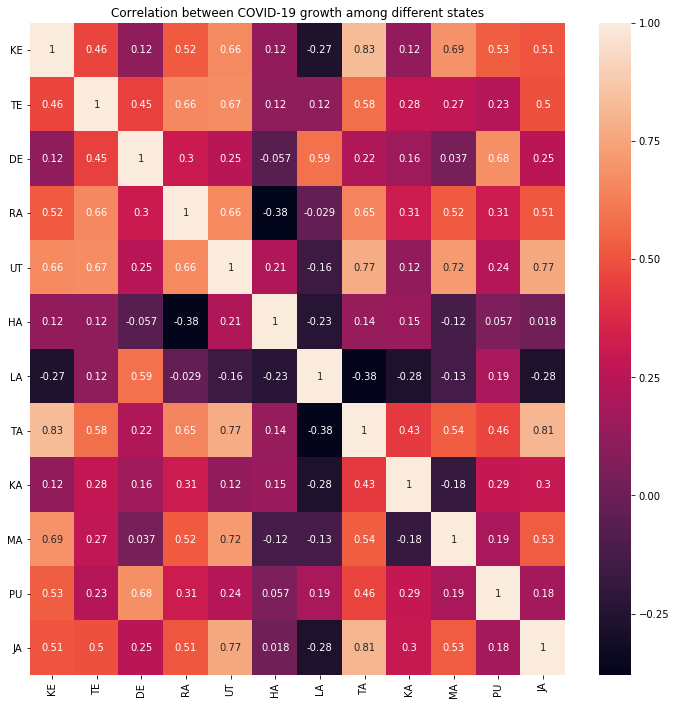

In [1442]:
newcases_timeseries = state_timeseries.diff().dropna()
newcases_timeseries.corr()
labels = [s.upper()[:2] for s in newcases_timeseries.columns]

import matplotlib.pyplot as plt
import seaborn as sns


fig = plt.figure(figsize=(12,12))  # figure so we can add axis
ax = fig.add_subplot(111)  # define axis, so we can modify
#im=ax.matshow(newcases_timeseries.corr(), cmap=plt.cm.RdYlGn)  # display the matrix
ax = sns.heatmap(newcases_timeseries.corr(),annot=True)
ax.set_xticks(np.arange(len(labels))+0.5)  # show them all!
ax.set_yticks(np.arange(len(labels))+0.5)  # show them all!
ax.set_xticklabels(labels)  # set to be the abbv (vs useless #)
ax.set_yticklabels(labels)  # set to be the abbv (vs useless #)

ax.set_title('Correlation between COVID-19 growth among different states')
#plt.colorbar(im)

plt.show()